In [45]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from operator import itemgetter
from networkx.algorithms import community
import community as community_louvain
from matplotlib import cm
import numpy as np
import urllib
import os
from os import path
import pickle
from cdlib import algorithms
from networkx.algorithms import assortativity
import random

os.chdir('./Dati')
print("current directory is : " + os.getcwd())

current directory is : C:\Users\david\Desktop\Progetto\YouTube\Dati


## Load dataset

In [118]:
dataset = pd.read_csv('./YTdataset_finale.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197132 entries, 0 to 197131
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   comment_id                           197132 non-null  object
 1   videoId                              197132 non-null  object
 2   comment                              197130 non-null  object
 3   channel_id_x                         197132 non-null  object
 4   reply_count                          197132 non-null  int64 
 5   like_count_x                         197132 non-null  int64 
 6   id                                   197132 non-null  object
 7   channel_id_y                         197132 non-null  object
 8   titolo                               197132 non-null  object
 9   durata                               197132 non-null  object
 10  view_count                           197132 non-null  int64 
 11  like_count_y              

## Creazione grafo

In [124]:
# questa funzione prende il valore masssimo di sentiment analysis e assegna un colore, se valore = 0 sentiment = neutral 

def extract_color(s):
    color_dict= {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'neutral': 'purple' }
    j = json.loads(s.replace("'", "\""))
    if j['Happy']==0.0 and j['Angry']==0.0 and j['Surprise']==0.0 and j['Sad']==0.0 and j['Fear']==0.0:
        return color_dict['neutral']
    return color_dict[max(j.items(), key=itemgetter(1))[0]]

In [ ]:
#i nodi sono video_channel_id - channel_comment_id
grafo = nx.Graph()
for (channel_video_id, channel_comment_id, sentiment_video, sentiment_comment) in zip(dataset['channel_id_y'], dataset['channel_id_x'], dataset['sentiment_analysis_title_translated'], dataset['sentiment_analysis_commenti']):
    grafo.add_node(channel_video_id, color= extract_color(sentiment_video))
    grafo.add_node(channel_comment_id, color=extract_color(sentiment_comment))
    
    grafo.add_edge(channel_video_id, channel_comment_id)
    
print(nx.info(grafo))

### Salviamo su file il grafo

In [ ]:
nx.write_gexf(grafo, 'grafo.gexf')

In [193]:
grafo = nx.read_gexf('grafo.gexf')
print(nx.info(grafo))

Name: 
Type: Graph
Number of nodes: 73085
Number of edges: 136413
Average degree:   3.7330


# MEASURES GRAPH

### DEGREE ASSORTATIVITY:
corrisponde alla misura di similarità tra le connessione del grafo rispetto al degree dei nodi.

In [5]:
degree_assortativity = 0
if path.exists("./file pickle/degree_assortativity.pkl"):
    print("EXIST")
    infile = open("./file pickle/degree_assortativity.pkl",'rb')
    degree_assortativity = pickle.load(infile)
    infile.close()
else:
    degree_assortativity = assortativity.degree_assortativity_coefficient(grafo)
    f = open("./file pickle/degree_assortativity.pkl","wb")
    pickle.dump(degree_assortativity, f)
    f.close()
    
print('Degree assortativity: ',degree_assortativity)

EXIST
Degree assortativity:  -0.3011653355276622


This network has an assortativity coefficient of -0.3011, which means that hubs have a slight preference to attach to peripheral nodes.

### AVERAGE DEGREE OF THE NEIGHBORHOOD:
corrisponde al degree medio del vicinato di ciascun nodo.

In [10]:
avg_neighbor_degree = {}
if path.exists("./file pickle/avg_neighbor_degree.pkl"):
    print("EXIST")
    infile = open("./file pickle/avg_neighbor_degree.pkl",'rb')
    avg_neighbor_degree = pickle.load(infile)
    infile.close()
else:
    avg_neighbor_degree = assortativity.average_neighbor_degree(grafo)
    f = open("./file pickle/avg_neighbor_degree.pkl","wb")
    pickle.dump(avg_neighbor_degree, f)
    f.close()

sorted_avg_neighbor = sorted(avg_neighbor_degree.items(), key=itemgetter(1), reverse=True)
print("Sorted average neighborhood degree:")
for b in sorted_avg_neighbor[:5000]:
    print(b)


EXIST
Sorted average neighborhood degree:
('UCbIPnyk-X43xdZokenar9Qw', 9896.0)
('UCSnZg0Qy7tqrmqxDhBkeDIg', 9896.0)
('UCpP4q2JOTZ4P-v0DXgRZQgw', 9896.0)
('UCnWsBQ9Bv8hKLnwu627hcag', 9896.0)
('UCxc10141vsUnAXmY4_JzoFg', 9896.0)
('UCIrgPwP5ej7JiFII1jXxsXw', 9896.0)
('UCZw5hCebSxDzS-Z0NGSqNBA', 9896.0)
('UC9pN7AC4Vsc-obvFGFrS8TQ', 9896.0)
('UCXY9G-3NoIDY1QeW20GNsJw', 9896.0)
('UCjpb8vThaAGkHvBVDCevlUw', 9896.0)
('UC1D5XrXrcowH314Ikf80ynA', 9896.0)
('UCOZ1Ci2l8OtN7ZbnVeAMVlA', 9896.0)
('UCAiScVfVvNfyzZIqZiWmX9g', 9896.0)
('UCnKhzOtAmiDcKuw0dEzEZxg', 9896.0)
('UCPOUEqvAQHwDpxvBYC7xR2w', 9896.0)
('UCUiPvgiKM9w3GEaNPJX2F8g', 9896.0)
('UC2yxlH8uxONrI-pWjmLkbaQ', 9896.0)
('UCgO6M_Eu5zo9tLo-Q6Z8Uwg', 9896.0)
('UCNS4P9fIs3O1VU4Ou-PlqLw', 9896.0)
('UCYG1tYT9hyAFoGrVy0DyqoQ', 9896.0)
('UCWLAUJkMRn66acez4zgHcYg', 9896.0)
('UCyLeY6sIUZbzfvxiy8p59Dg', 9896.0)
('UC1NgpiGDL3B_c--FbbBGGoA', 9896.0)
('UCIxJDf6zlmOHOtj8580jH4g', 9896.0)
('UCQo03l0TdR7TfmzvD458gew', 9896.0)
('UCgMgHsYbw_Ba0NESFXtbUWQ', 9896

('UCT9HqlDmEblemuyLdj1g_EA', 9896.0)
('UCs7Z3gVUIq8-t6UR8gtGFdw', 9896.0)
('UC3pTpViJ8OUWSDgb5qHCc2Q', 9896.0)
('UCY5MRSED2y5NPNE7VGsD8EQ', 9896.0)
('UCL0JnbdGXfXHs4_6tW9WQKg', 9896.0)
('UCfLqiSgBLqziyHKRyS_uQLA', 9896.0)
('UCEqZepuGqcipO7wInWtwaRQ', 9896.0)
('UCzLX2dLCctziPsvz6T0mZSg', 9896.0)
('UC88y7HWB0ghGpmex-V8NiSA', 9896.0)
('UCy-brCTbE9Rx1lawA3J2iww', 9896.0)
('UCIbPFOYB0WWCma7wbWfSvgw', 9896.0)
('UCo_YdSTvYF9zr6Od1svg3UA', 9896.0)
('UCjCFptdYc4oXrr0cQuRpaug', 9896.0)
('UCCgZS3g6EoJEpnhG-54Echw', 9896.0)
('UCrAYw0QFvuMu89pJ1dKgJuA', 9896.0)
('UCaM23PMCitLHXsXjxpzUDTg', 9896.0)
('UC3o31hiPx2d5Sr-PPEotxUw', 9896.0)
('UC6bJ1_pas-lQT3EcziDEMdw', 9896.0)
('UCpR3k8xz_hbQZnb2ak7CkXg', 9896.0)
('UChJJyUFFiF7s41_rwXYUlZg', 9896.0)
('UCoDf_KBcyRQhDu1nJi-43eA', 9896.0)
('UCANcNvIGoO-BqC1VVylC-DA', 9896.0)
('UCh6vfvDlFaj76XY-86YDarg', 9896.0)
('UCwwT7T8qoHlcNlgupo-6D-Q', 9896.0)
('UCtwMnCWr71cv9bfSx86qprw', 9896.0)
('UCO4zXgXvtvVN4qJNMN9e1SA', 9896.0)
('UCedt-9IBrarr7KU6u0_l8gA', 9896.0)
(

('UC63hPlSpdG7NNYXkAHlyAdQ', 9896.0)
('UC4mh1dfWq6yJEKJBZ3ixTLA', 9896.0)
('UC6INIuN0iprwxphS8XbVNtg', 9896.0)
('UCOr7Co7Z1DDMss8wMc6LcFw', 9896.0)
('UC-5JlrJI7BpAGbfSfA_9uCw', 9896.0)
('UC5WR1KINPLM6ExGMAjsvFWQ', 9896.0)
('UCAmxSL5gy3FQ5l3B7O5aCKQ', 9896.0)
('UCZFKQTrxFSFbOuwWhSvx_EA', 9896.0)
('UC4f0uLRYpnr2v5CsLmZXtUA', 9896.0)
('UCeG5HlkrkZ4uiH0HUKLxrgQ', 9896.0)
('UC5XbKKHChCGBK2maG7WcEIQ', 9896.0)
('UCQt2SPT2sHd7eBvkyQTSxNQ', 9896.0)
('UCQOw0fnKlUGpoWW_xSMQBKA', 9896.0)
('UCX-k2KaipVgu16FjjkbhQFg', 9896.0)
('UChufmhi5h4j7Rcu1nh_GA-A', 9896.0)
('UCPj9G5Jfmskj__t2c6Jrq0g', 9896.0)
('UC2Xx7ETfap4JEZINO0PPzvg', 9896.0)
('UCi-sLRx7-GPEXQurNxRfIqw', 9896.0)
('UCH2N6rSDkUe9MPs-4AKkNyg', 9896.0)
('UC2STkiOqQUDWJO9AOxxNikA', 9896.0)
('UCP3fBPGA7zs8hDBMYjb_zjA', 9896.0)
('UCTjq-r2dvYmswp222ppOFVw', 9896.0)
('UCO2dzdhwcuEOiXQp9tfI0cA', 9896.0)
('UCDJHKp18LyVcPpaT8xkGfRQ', 9896.0)
('UC6u0BXS8wG9ah05IrK2izDg', 9896.0)
('UCObcczTLzyKfOKbk0qimPyw', 9896.0)
('UCkI6Yi1g37f4AesjftIkwDA', 9896.0)
(

('UCwqAdOv-gDU5KnO8-53zXHQ', 9896.0)
('UCijYySBoBdYIScsd7KgkRpA', 9896.0)
('UCGFOuOC1aBXnCwNoukchsbQ', 9896.0)
('UCmhYSopJ6rJsZ-rHt0CHhjA', 9896.0)
('UC5FXhbK76rdWNUw9Z0QeUeQ', 9896.0)
('UC1wOhMz4kpnU8zdrrdj_TcQ', 9896.0)
('UCTtcj1Ghm7gtFcvd7KeWBWw', 9896.0)
('UCRzQVi73K_LRJhVb3SxP9cQ', 9896.0)
('UCs40USrGEX0dkW76BoOrP7w', 9896.0)
('UCXapWPzUi9L7kt3UJhMgmIw', 9896.0)
('UC5Gh-gMoSfc2xtJz2CkMgDA', 9896.0)
('UC0XEGSHe9W-7cm525kgkHhA', 9896.0)
('UCPpbDTCawAeC977vZkkXvJQ', 9896.0)
('UCBTuDpRXL7jsDV9VoPorwOQ', 9896.0)
('UC8L2AXrQRZ2znZEzov_fwhg', 9896.0)
('UCD8T9HQwb9RPCvJcURqYmnw', 9896.0)
('UC_FqFSyP9E86qfVQe7OalMQ', 9896.0)
('UC7_wxscqpPL5IP8UWbh8nkg', 9896.0)
('UCAgE7Pbl-qZyGbBEt1MHxmw', 9896.0)
('UCuhN9JUbDrh_uPb28I-HBhQ', 9896.0)
('UC7YWlO0_6zPg4KNbW5W7AsA', 9896.0)
('UCzeNnrOgej7Oxxrs-cVFWvA', 9896.0)
('UCKWKRkbXyFC6TSo68c65U1Q', 9896.0)
('UCE4S48s19UDxY3mt_wNv4Ug', 9896.0)
('UC6t_jqA7JKVjjNvFwuYxmzQ', 9896.0)
('UC4n2cSL4TUlcipy8vMxR04Q', 9896.0)
('UCGce0j_gxh0Druo59M3p8Yw', 9896.0)
(

('UC0FVELn_PnNypjdL1jU8aTg', 9896.0)
('UCnB_TpfiWsOJVVXOSWxbv4A', 9896.0)
('UClnut7MPNTFZNmmthfVWzYw', 9896.0)
('UCClQ8BbZQVt2Zq8Y71eMb2A', 9896.0)
('UCDGhPD-6ioEUPZSysbp2ObA', 9896.0)
('UCJf1xnBBEDr_SJqAQg_n4vA', 9896.0)
('UC5UZ8Dn9pE77SJA5OrCDh3A', 9896.0)
('UChVAhECYny3cVFP254j1lKg', 9896.0)
('UC5LgtU04gLW67VAoJYhRKIQ', 9896.0)
('UC_vrcwnIgPGqmCZh4ZoviSw', 9896.0)
('UCAsge2Nt1Njr2e-OCOrsV5w', 9896.0)
('UCUybNqTe0ybcPnFSFlMSsbA', 9896.0)
('UCv1uL4bFCnIJwsg_HMcEXBg', 9896.0)
('UC6JaYq015Tkwn3MJ0Lq44Ag', 9896.0)
('UCbBOiwqHe4JwgYx7_gqByeg', 9896.0)
('UC9sIEYXYbBiArr5wg42axjw', 9896.0)
('UCn-UpY88sW8ftjUGU-y8jzw', 9896.0)
('UChXtg7At522Odmxuyh-VECA', 9896.0)
('UCsqRwGX9Ee_lruAwmnYYfgA', 9896.0)
('UCu9nxfGddIdu2e83eJALy-Q', 9896.0)
('UCHjohE7AhKikXElVd-RtTYw', 9896.0)
('UCNyWv6cNVf36tBmDYuPC1Tw', 9896.0)
('UCWABVLyYXOeGmHuVvEv56_Q', 9896.0)
('UCD50pxzHuXJG3sPjeq7J6Rg', 9896.0)
('UCkeckwWBkgz3qcyCuHhQ3Lw', 9896.0)
('UCw4iU-hUkjsNOd-MI_PfeTQ', 9896.0)
('UCkSIiI7FChfaMFkAUqum5bQ', 9896.0)
(

('UCKfRpN03foz5pah18l1CXnA', 7475.0)
('UCQUhYRPM5CACGJcK7VOc-QA', 7475.0)
('UCb20FR2WLz94ErcbKYjzl8w', 7475.0)
('UCxTB0JIdNPqucqE3U4HREQQ', 7475.0)
('UCI3ZGWpQ9kWnVj6Zm5IFHIg', 7475.0)
('UCyBd4ycW09CyPUlEORNeAKA', 7475.0)
('UCJX9h5ngvBbTv7THSXdRmpQ', 7475.0)
('UCrLKcmjHt0R0zG9KD2SRFeg', 7475.0)
('UCpf6LxmUXHiWYEVkRWm7L8Q', 7475.0)
('UCZtjDe5JwH8HA21SphxmRgQ', 7475.0)
('UCMqPc8Z_IQG1YVPjHPGeUYw', 7475.0)
('UClmR_MhTYTsHinxZjyYA1ew', 7475.0)
('UCQOAuJpiQ8d1Ijz-mQGb0NQ', 7475.0)
('UCJoYo1_8WIAJ35O00kLYK4w', 7475.0)
('UCLHB9tFIpCyCgD3bXhxYH7A', 7475.0)
('UCGA92RDbx6EIZ9eWL2va9rA', 7475.0)
('UC9X5aZ0Zcf0DbCTWBiiAonw', 7475.0)
('UCyE_wvsDejaTr831-muRoUA', 7475.0)
('UCt4VVhw5ovXwrrc1EiLpaHw', 7475.0)
('UCz2WRkLLYWgu6DcrshnF2uQ', 7475.0)
('UCCAn1HzPrRplKcO0rZuaDhw', 7242.666666666667)
('UC_0Exvdb2x207_RQLx0P11A', 7242.666666666667)
('UC9tT0kqcw1KZuiGDSq5hvmg', 7242.666666666667)
('UCPHmWmqpaxYKghztrSGWSjw', 7037.0)
('UClnJemV9iAOnGNPrTVxLaPg', 7037.0)
('UCta7uqf0xc0-O57xbjGqT2A', 7037.0)
('UCF

('UC5PAWcD1c4iLJ95YVRADKug', 7037.0)
('UCYvI4RImgZLim5Y-aRj98TQ', 7037.0)
('UCzNGg4pi54jzJH_e65KYy3A', 7037.0)
('UCEAaCjjRIB0Z0gIoHugqmNA', 7037.0)
('UCZDH9NMF6nMg4B7H0bZQTiQ', 7037.0)
('UCi-6fYRp7skoENFyHaXQV7g', 7037.0)
('UCJzls_YASCiwf2NSHeDXHRA', 7037.0)
('UCtxP5MPSVo6n1DsBuayWC7g', 7037.0)
('UCWUwJZP3oK0OpL3d0XAsWZA', 7037.0)
('UC5NfxJg5M64rQfhXGwGNB_w', 7037.0)
('UCQjeOmouHRz1tqdx2rIzXmQ', 7037.0)
('UCgBel1rPBym7MBXtFPjf0FA', 7037.0)
('UCG7_z5DPWVpnDIN_iXPM7aQ', 7037.0)
('UCSdkeq8ouBtFoFNAubB-WbQ', 7037.0)
('UCbR-QzaySGI_CMYd6EVa35Q', 7037.0)
('UCtUvVVLPPLUiVjqL_uAHwPg', 7037.0)
('UCo-e5uiIp3p5GrGIWZX3fZg', 7037.0)
('UCpDxioelTgZTBQTBaYwFlmQ', 7037.0)
('UCFt7pMw2T4JvEWMQwxU9CRQ', 7037.0)
('UCnpJBosTiJzJ449vR7CQx3w', 7037.0)
('UC7pFHMWS0lXlAIWPBR5zCIw', 7037.0)
('UCABioMaEotO3LtC7K8RC0uQ', 7037.0)
('UCv5OsP_ptqgkoeS8w4_Hd_Q', 7037.0)
('UCslZqEIEumt84u66UpkfTAQ', 7037.0)
('UCKVaAk5sWpBP2lHHP0fhIAw', 7037.0)
('UCutTnwRErYAT8XdFJ0ORsUA', 7037.0)
('UCoMEM3OlU0rDcLEFjCUlPAA', 7037.0)
(

('UCnTSCRHeDlSYjTN265LJCaQ', 6778.0)
('UCsCGjU5hemb-IC3-jg11UpQ', 6778.0)
('UCZ_-s5NpPkIsPIQCjX2txog', 6778.0)
('UC4nhms-bglGKjPdsRrPuvwA', 6778.0)
('UCwYXO7vzavf7xIcnB1vSOcw', 6778.0)
('UCQW6yth0Lx4HqUrvCn5iR6g', 6778.0)
('UC15XqbYpzaOQPpHBNfMNoqw', 6778.0)
('UCpbFdZFncEVG6BDPX7Di9rA', 6778.0)
('UC3vyDmd_ECcX25J9ZdUKpEQ', 6778.0)
('UCz8lXDyvOL_EkfXhJK62p3Q', 6778.0)
('UCgQE4RmHSUb6i0vUX7vnd5Q', 6778.0)
('UCwdsVrhgVYdpj7lOoFUzdbw', 6778.0)
('UCOocF6taJ-z-2Cw6sY8rG0A', 6778.0)
('UC4bjCZxSwu7omMgq0hiofPg', 6778.0)
('UC3SCOjcBbiE3jwTScj4PlOQ', 6778.0)
('UCuHRynxM4W7YtBjaC4KKITw', 6778.0)
('UChQs_b8QX8yO5UsewxLdE2w', 6778.0)
('UCs6Z4-2vPVjJJZykhEsB9pw', 6778.0)
('UCrOKAmGJBQJxaEw9khJJRGQ', 6778.0)
('UCn8iBQakZqvjlbf0-gFnk8w', 6778.0)
('UCRxUvyz7kP1_mQe7pK_2o4w', 6778.0)
('UCbymMDPJ13CHDZ7zFQyUlgw', 6778.0)
('UClDcpA7Pji_sU5j-JCX0Bjw', 6778.0)
('UCkntqc4NvqXN7W6r6AZvVRg', 6778.0)
('UCWQq8ropaOxMXZ_zUutxtLA', 6778.0)
('UCrYLgo_2VxsopLNwOuOx-0g', 6778.0)
('UCfQPTqTERJftrvmhEjl_gZA', 6778.0)
(

('UCpJYBjOIGRHtRR8tC_B_Dpw', 6778.0)
('UCWnAiFQMIkhZLMDVSRFGeZg', 6778.0)
('UCySgurUTqq2FIzA_hVcZvXA', 6778.0)
('UCPLl2uu2Epv_lj26UPGueDw', 6778.0)
('UCwf_Kbi9mAOHVp3AzSNP9Uw', 6778.0)
('UCxkl46B0T3QMyi9S2Rk4VqQ', 6778.0)
('UCu7rANjwVs_44HGdo1uxAyQ', 6778.0)
('UCdOM5TSElZ9xnebHR4hIsFA', 6778.0)
('UCfCtq41FhkTuaRhzYwE7vNQ', 6778.0)
('UC7AxaQMLg62C_ScIP5UgDrg', 6778.0)
('UCzLcR-HIp31DlKeRGhpJA_w', 6778.0)
('UC3Fik_PdNjmshanIVMiKCMw', 6778.0)
('UCHBkdE2Bkl5mjqdXkraf4TQ', 6778.0)
('UCWDFaWW2K3E5ko5uVVrpvmA', 6778.0)
('UCV16a0ecpvQaHXr2DLhZxxw', 6778.0)
('UCI3iTjk2cIgM0CxdVia49fA', 6778.0)
('UCmwFsT1oBR1K2a5ihq3znSw', 6778.0)
('UC0iDFtw5gmQfaNwy7BjTyoQ', 6778.0)
('UCp_KKJLVKQk9CA9LwDCzN5w', 6778.0)
('UCaASdnzJj4Z_IlBtcMDyZVg', 6778.0)
('UCM3ETiZY6xaaO6zoIZ4lU-g', 6778.0)


In [16]:
print(list(nx.all_neighbors(grafo, 'UCbIPnyk-X43xdZokenar9Qw')))
print(len(list(nx.all_neighbors(grafo, 'UCaXkIU1QidjPwiAYu6GcHjg'))))

['UCaXkIU1QidjPwiAYu6GcHjg']
9896


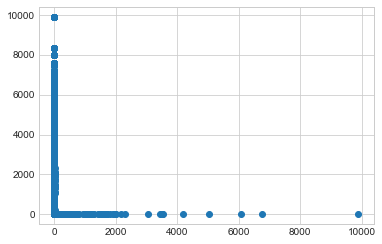

In [26]:
count_vicini_dict = {} 
for value in avg_neighbor_degree.keys():
    count_vicini_dict[value]= len(list(nx.all_neighbors(grafo, value)))

plt.scatter(count_vicini_dict.values(), avg_neighbor_degree.values())

(array([22197., 15960.,  8563.,  8422.,  4005.,  4648.,  5492.,   976.,
          484.,  2338.]),
 array([1.0000e+00, 9.9050e+02, 1.9800e+03, 2.9695e+03, 3.9590e+03,
        4.9485e+03, 5.9380e+03, 6.9275e+03, 7.9170e+03, 8.9065e+03,
        9.8960e+03]),
 <a list of 10 Patch objects>)

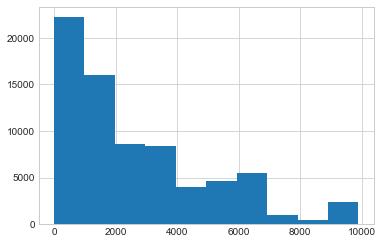

In [27]:
plt.hist(avg_neighbor_degree.values())

### DEGREE:
corrisponde al numero di nodi adiacenti per ogni nodo.

In [76]:
degree_dict ={}
if path.exists("./file pickle/degree_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/degree_dict.pkl",'rb')
    degree_dict = dict(pickle.load(infile))
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    infile.close()
else:
    print("COMPUTING...")
    degree_dict = dict(grafo.degree(grafo.nodes()))
    f = open("./file pickle/degree_dict.pkl","wb")
    pickle.dump(degree_dict, f)
    f.close()

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

EXIST
Top 20 nodes by degree:
('UCaXkIU1QidjPwiAYu6GcHjg', 9896)
('UC0QHWhjbe5fGJEPz3sVb6nw', 6778)
('UC3XTzVzaHQEd30rQbuvCtTQ', 6063)
('UCn4sPeUomNGIr26bElVdDYg', 5054)
('UCupvZG-5ko_eiXAupbDfxWw', 4178)
('UCMSsLqxqvZsNXi0Z-VjN89A', 3534)
('UCH1oRy1dINbMVp3UFWrKP0w', 3524)
('UCXIJgqnII2ZOINSWNOGFThA', 3442)
('UCC_0vyFTKk1Nlodo4QsiQkw', 3060)
('UCoWZ_PsG1SSShZ_6ORL5-uA', 2295)
('UCHd62-u_v4DvJ8TCFtpi4GA', 2184)
('UCLXo7UDZvByw2ixzpQCufnA', 2016)
('UCknLrEdhRCp1aegoMqRaCZg', 1992)
('UCHbq_l1qnuomfJCYQTsWf_Q', 1966)
('UCvJJ_dzjViJCoLf5uKUTwoA', 1907)
('UCgRBRE1DUP2w7HTH9j_L4OQ', 1834)
('UChDKyKQ59fYz3JO2fl0Z6sg', 1736)
('UCsN32BtMd0IoByjJRNF12cw', 1729)
('UCgrNz-aDmcr2uuto8_DL2jg', 1704)
('UCoMdktPbSTixAyNGwb-UYkQ', 1612)


### AVERAGE CLUSTER:
corrisponde alla media del coefficiente di cluster per il grafo.

In [8]:
avg_cluster = 0
if path.exists("./file pickle/avg_cluster.pkl"):
    print("EXIST")
    infile = open("./file pickle/avg_cluster.pkl",'rb')
    avg_cluster = pickle.load(infile)
    infile.close()
else:
    print("COMPUTING AVG CLUSTER")
    avg_cluster = nx.average_clustering(grafo)
    f = open("./file pickle/avg_cluster.pkl","wb")
    pickle.dump(avg_cluster, f)
    f.close()

print('Average cluster: ',avg_cluster)

EXIST
Average cluster:  0.0006155364615177621


### DENSITY

corrisponde alla media dei gradi dei nodi

In [9]:
density = 0
if path.exists("./file pickle/density.pkl"):
    print("EXIST")
    infile = open("./file pickle/density.pkl",'rb')
    density = pickle.load(infile)
    infile.close()
else:
    density = nx.density(grafo)
    f = open("./file pickle/density.pkl","wb")
    pickle.dump(density, f)
    f.close()

print('Average Density: ',density)

EXIST
Average Density:  5.107815427148268e-05


### DIAMETER:
corrisponde alla lunghezza del più lungo cammino medio nel grafo.

In [10]:
if path.exists("./file pickle/largest_component.pkl") & path.exists("./file pickle/subgraph.pkl") & path.exists("./file pickle/diameter.pkl"):
    print("EXIST")
    infile = open("./file pickle/largest_component.pkl",'rb')
    largest_component = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/subgraph.pkl",'rb')
    subgraph = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/diameter.pkl",'rb')
    diameter = pickle.load(infile)
    infile.close()
else:
    components = nx.connected_components(grafo)
    largest_component = max(components, key=len)

    subgraph = grafo.subgraph(largest_component)
    diameter = nx.diameter(subgraph)
    
    f = open("./file pickle/largest_component.pkl","wb")
    pickle.dump(largest_component, f)
    f.close()
    
    f = open("./file pickle/subgraph.pkl","wb")
    pickle.dump(subgraph, f)
    f.close()
    
    f = open("./file pickle/diameter.pkl","wb")
    pickle.dump(diameter, f)
    f.close()

print("Network diameter of largest component:", diameter)

EXIST
Network diameter of largest component: 18


### TRIADIC CLOSURE

Corrisponde alla frazione di tutti i possibili triangoli

In [11]:
triadic_closure = 0
if path.exists("./file pickle/triadic_closure.pkl"):
    print("EXIST")
    infile = open("./file pickle/triadic_closure.pkl",'rb')
    triadic_closure = pickle.load(infile)
    infile.close()
else:
    triadic_closure = nx.transitivity(grafo)
    f = open("./file pickle/triadic_closure.pkl","wb")
    pickle.dump(triadic_closure, f)
    f.close()
print("Triadic closure: ", triadic_closure)

EXIST
Triadic closure:  1.1345673150867514e-06


### BETWEENNESS

Corrisponde alla somma della frazione dei cammini minimi di tutte le coppie che passano per il nodo v

In [67]:
betweenness_dict = {}

if path.exists("./file pickle/betweenness_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/betweenness_dict.pkl",'rb')
    betweenness_dict = pickle.load(infile)
    infile.close()
else:
    betweenness_dict = betweenness_centrality_parallel(grafo) 
    f = open("./file pickle/betweenness_dict.pkl","wb")
    pickle.dump(betweenness_dict, f)
    f.close()

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

EXIST
Top 20 nodes by betweenness centrality:
('UCaXkIU1QidjPwiAYu6GcHjg', 0.21668995595082374)
('UC0QHWhjbe5fGJEPz3sVb6nw', 0.14434054814174638)
('UC3XTzVzaHQEd30rQbuvCtTQ', 0.12893830564103906)
('UCn4sPeUomNGIr26bElVdDYg', 0.098617020864945)
('UCMSsLqxqvZsNXi0Z-VjN89A', 0.06965252547671248)
('UCupvZG-5ko_eiXAupbDfxWw', 0.06552496283047596)
('UCH1oRy1dINbMVp3UFWrKP0w', 0.060835005657224994)
('UCXIJgqnII2ZOINSWNOGFThA', 0.05951765239344415)
('UCC_0vyFTKk1Nlodo4QsiQkw', 0.0541059582480642)
('UCoWZ_PsG1SSShZ_6ORL5-uA', 0.03887857057176462)
('UCLXo7UDZvByw2ixzpQCufnA', 0.03359906892766591)
('UCHd62-u_v4DvJ8TCFtpi4GA', 0.03209621045218759)
('UCknLrEdhRCp1aegoMqRaCZg', 0.027770068689119205)
('UCHbq_l1qnuomfJCYQTsWf_Q', 0.0277441367251701)
('UCvJJ_dzjViJCoLf5uKUTwoA', 0.026592517493207655)
('UCoMdktPbSTixAyNGwb-UYkQ', 0.025355861139523483)
('UC9ePmjVRHLL8x8vq5fOKflg', 0.02529681218740331)
('UC8Ioh4atNDO5a0Vy2qFmauQ', 0.02523245495465457)
('UCWJhBqnyVdHAuxexgjghNFw', 0.024841711048450003)
('U

### EIGENVECTOR CENTRALITY

Corrisponde alla centralità di un nodo in base alla centralità dei suoi vicini

In [75]:
eigenvector_dict = {}
if path.exists("./file pickle/eigenvector_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/eigenvector_dict.pkl",'rb')
    eigenvector_dict = pickle.load(infile)
    infile.close()
else:
    eigenvector_dict = nx.eigenvector_centrality_numpy(grafo)
    f = open("./file pickle/eigenvector_dict.pkl","wb")
    pickle.dump(eigenvector_dict, f)
    f.close()

sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

EXIST
Top 20 nodes by eigenvector centrality:
('UCaXkIU1QidjPwiAYu6GcHjg', 0.632572485898974)
('UC0QHWhjbe5fGJEPz3sVb6nw', 0.14902063554885805)
('UCupvZG-5ko_eiXAupbDfxWw', 0.13883095488077107)
('UC3XTzVzaHQEd30rQbuvCtTQ', 0.12125038288292143)
('UCn4sPeUomNGIr26bElVdDYg', 0.10972473569118306)
('UCH1oRy1dINbMVp3UFWrKP0w', 0.07023073780557391)
('UCMSsLqxqvZsNXi0Z-VjN89A', 0.06138713983713464)
('UCXIJgqnII2ZOINSWNOGFThA', 0.05640647378092392)
('UCHd62-u_v4DvJ8TCFtpi4GA', 0.044214334356240274)
('UCC_0vyFTKk1Nlodo4QsiQkw', 0.04090380578850869)
('UCsN32BtMd0IoByjJRNF12cw', 0.03968987953182265)
('UChDKyKQ59fYz3JO2fl0Z6sg', 0.03673854587035476)
('UCLXo7UDZvByw2ixzpQCufnA', 0.03578765782773601)
('UChqUTb7kYRX8-EiaN3XFrSQ', 0.035681082533546724)
('UCvJJ_dzjViJCoLf5uKUTwoA', 0.03332877467300382)
('UCknLrEdhRCp1aegoMqRaCZg', 0.03304874843403383)
('UCHbq_l1qnuomfJCYQTsWf_Q', 0.029715598983098262)
('UCoWZ_PsG1SSShZ_6ORL5-uA', 0.025528069184435183)
('UCgRBRE1DUP2w7HTH9j_L4OQ', 0.025527657580089198)
(

### Vote Rank: calcola un elenco di nodi influenti in un grafico utilizzando l'algoritmo di VoteRank
VoteRank calcola una classifica dei nodi in un grafico G in base a uno schema di voto. Con VoteRank, tutti i nodi votano per ciascuno dei suoi vicini e il nodo con i voti più alti viene eletto in modo iterativo. La capacità di voto dei vicini esterni ai nodi eletti viene ridotta nei turni successivi.

In [14]:
voterank_list = []
if path.exists("./file pickle/voterank_list.pkl"):
    print("EXIST")
    infile = open("./file pickle/voterank_list.pkl",'rb')
    voterank_list = pickle.load(infile)
    infile.close()
else:
    voterank_list = nx.voterank(grafo)
    f = open("./file pickle/voterank_list.pkl","wb")
    pickle.dump(voterank_list, f)
    f.close()

print("Top 20 nodes by voterank_list:")
for b in voterank_list[:20]:
    print(b)

EXIST
Top 20 nodes by voterank_list:
UCaXkIU1QidjPwiAYu6GcHjg
UC0QHWhjbe5fGJEPz3sVb6nw
UC3XTzVzaHQEd30rQbuvCtTQ
UCn4sPeUomNGIr26bElVdDYg
UCupvZG-5ko_eiXAupbDfxWw
UCMSsLqxqvZsNXi0Z-VjN89A
UCXIJgqnII2ZOINSWNOGFThA
UCH1oRy1dINbMVp3UFWrKP0w
UCC_0vyFTKk1Nlodo4QsiQkw
UCoWZ_PsG1SSShZ_6ORL5-uA
UCHd62-u_v4DvJ8TCFtpi4GA
UCLXo7UDZvByw2ixzpQCufnA
UCHbq_l1qnuomfJCYQTsWf_Q
UCknLrEdhRCp1aegoMqRaCZg
UCvJJ_dzjViJCoLf5uKUTwoA
UCgRBRE1DUP2w7HTH9j_L4OQ
UCoMdktPbSTixAyNGwb-UYkQ
UCgrNz-aDmcr2uuto8_DL2jg
UCWJhBqnyVdHAuxexgjghNFw
UCsN32BtMd0IoByjJRNF12cw


### Recap dei nodi più rilevanti in termini di misure

In [116]:
top_betweenness = sorted_betweenness[:20]
print("20 MOST INFLUENT PEOPLE:")
for tb in top_betweenness: 
    degree = degree_dict[tb[0]]
    eigen = eigenvector_dict[tb[0]]
    print("ID:", tb[0], "- Betweenness: ","{:.5f}".format(tb[1]), " | Degree:" , degree, " | eigenvalue: ", "{:.5f}".format(eigen))

20 MOST INFLUENT PEOPLE:
ID: UCaXkIU1QidjPwiAYu6GcHjg - Betweenness:  0.21669  | Degree: 9896  | eigenvalue:  0.63257
ID: UC0QHWhjbe5fGJEPz3sVb6nw - Betweenness:  0.14434  | Degree: 6778  | eigenvalue:  0.14902
ID: UC3XTzVzaHQEd30rQbuvCtTQ - Betweenness:  0.12894  | Degree: 6063  | eigenvalue:  0.12125
ID: UCn4sPeUomNGIr26bElVdDYg - Betweenness:  0.09862  | Degree: 5054  | eigenvalue:  0.10972
ID: UCMSsLqxqvZsNXi0Z-VjN89A - Betweenness:  0.06965  | Degree: 3534  | eigenvalue:  0.06139
ID: UCupvZG-5ko_eiXAupbDfxWw - Betweenness:  0.06552  | Degree: 4178  | eigenvalue:  0.13883
ID: UCH1oRy1dINbMVp3UFWrKP0w - Betweenness:  0.06084  | Degree: 3524  | eigenvalue:  0.07023
ID: UCXIJgqnII2ZOINSWNOGFThA - Betweenness:  0.05952  | Degree: 3442  | eigenvalue:  0.05641
ID: UCC_0vyFTKk1Nlodo4QsiQkw - Betweenness:  0.05411  | Degree: 3060  | eigenvalue:  0.04090
ID: UCoWZ_PsG1SSShZ_6ORL5-uA - Betweenness:  0.03888  | Degree: 2295  | eigenvalue:  0.02553
ID: UCLXo7UDZvByw2ixzpQCufnA - Betweenness:  

# COMMUNITIES

## MODULARITY COMMUNITY
La modularità è una misura della struttura delle reti o dei grafici. È stato progettato per misurare la forza della divisione di una rete in moduli (chiamati anche gruppi, cluster o comunità). Le reti con elevata modularità hanno connessioni fitte tra i nodi all'interno dei moduli ma connessioni sparse tra i nodi in moduli diversi. La modularità è spesso utilizzata nei metodi di ottimizzazione per rilevare la struttura della comunità nelle reti. Tuttavia, è stato dimostrato che la modularità soffre di un limite di risoluzione e, quindi, non è in grado di rilevare piccole comunità

In [2]:
if path.exists("./file pickle/modular_communities.pkl"):
    print("EXIST")
    infile = open("./file pickle/modular_communities.pkl",'rb')
    modular_communities = pickle.load(infile)
    infile.close()
else:
    modular_communities = community.greedy_modularity_communities(grafo)
    f = open("./file pickle/modular_communities.pkl","wb")
    pickle.dump(modular_communities, f)
    f.close()
    
modularity_dict = {} 
for i,c in enumerate(modular_communities): 
    for name in c: 
        modularity_dict[name] = i

modularity_dict_ = {}
for i in range(max(modularity_dict.values())+1):
    modularity_dict_[i] = len([k for (k, v) in modularity_dict.items() if v == i ])
print("N° di community trovate: ", len(modularity_dict_))
print("N° utenti per community:\n",modularity_dict_) 

EXIST
N° di community trovate:  120
N° utenti per community:
 {0: 7373, 1: 6203, 2: 5897, 3: 5897, 4: 4727, 5: 4254, 6: 4166, 7: 3786, 8: 3543, 9: 3063, 10: 2684, 11: 2369, 12: 2209, 13: 1985, 14: 1938, 15: 1780, 16: 1746, 17: 1738, 18: 1538, 19: 1501, 20: 1309, 21: 744, 22: 729, 23: 470, 24: 153, 25: 141, 26: 130, 27: 125, 28: 120, 29: 110, 30: 100, 31: 63, 32: 41, 33: 37, 34: 35, 35: 25, 36: 16, 37: 16, 38: 14, 39: 13, 40: 12, 41: 12, 42: 12, 43: 11, 44: 11, 45: 9, 46: 9, 47: 8, 48: 8, 49: 7, 50: 7, 51: 7, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 4, 61: 4, 62: 4, 63: 4, 64: 4, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 1, 118: 1

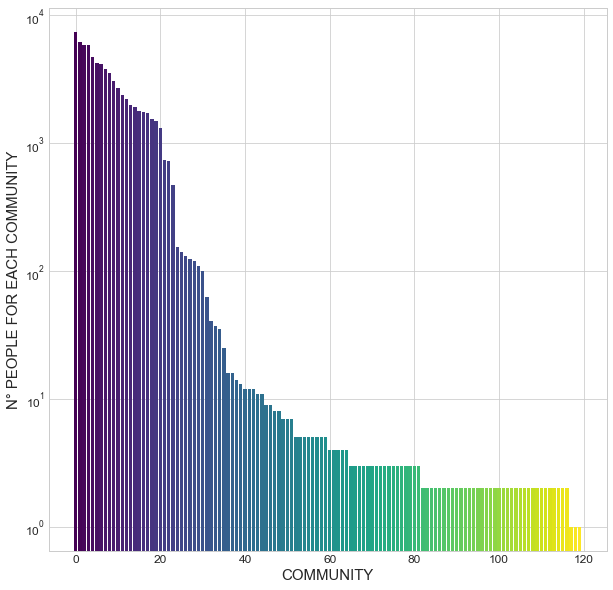

In [97]:
def plot_community(dictionary):
    x = list(dictionary.keys())
    y = list(dictionary.values())
    plt.figure(figsize=(10,10))
    cmap = cm.get_cmap('prism', len(dictionary))
    plt.xlabel("COMMUNITY",fontsize=15)
    plt.ylabel("N° PEOPLE FOR EACH COMMUNITY",fontsize=15);
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    list_color = ['viridis', 'prism', 'plasma', 'cividis']
    color = list_color[random.randint(0, len(list_color)-1)]
    my_cmap = plt.get_cmap(color, len(dictionary))
    plt.bar(x, y, color=my_cmap.colors)
    plt.yscale('log')
    plt.show()

plot_community(modularity_dict_)

## Louvain (Utilizza modularity)
Il metodo Louvain per il rilevamento della comunità è un algoritmo basasto sulla massimizzazione del punteggio di modularità per ogni community, dove la modularità quantifica la qualità di un'assegnamento di nodi ad una certa community. Ciò significa valutare quanto siano più densamente connessi i nodi all'interno di una community, rispetto a quanto sarebbero connessi in una rete casuale.

In [14]:
if path.exists("./file pickle/partition_louvain.pkl") & path.exists("./file pickle/partition_louvain_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/partition_louvain.pkl",'rb')
    partition_louvain = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/partition_louvain_dict.pkl",'rb')
    partition_louvain_dict = pickle.load(infile)
    infile.close()
else:
    partition_louvain = community_louvain.best_partition(grafo)
    f = open("./file pickle/partition_louvain.pkl","wb")
    pickle.dump(partition_louvain, f)
    f.close()
    partition_louvain_dict = {}
    for i in range(max(partition_louvain.values())+1):
        partition_louvain_dict[i] = len([k for (k, v) in partition_louvain.items() if v == i ])
    
    f = open("./file pickle/partition_louvain_dict.pkl","wb")
    pickle.dump(partition_louvain_dict, f)
    f.close()

print("N° di community trovate: ", len(partition_louvain_dict))
print("N° utenti per community:\n",partition_louvain_dict)

EXIST
N° di community trovate:  125
N° utenti per community:
 {0: 1246, 1: 2061, 2: 2282, 3: 2285, 4: 4146, 5: 233, 6: 5583, 7: 1499, 8: 7614, 9: 4783, 10: 1585, 11: 3580, 12: 8329, 13: 266, 14: 4202, 15: 3118, 16: 1091, 17: 3006, 18: 3116, 19: 751, 20: 1325, 21: 732, 22: 1643, 23: 1930, 24: 484, 25: 728, 26: 1995, 27: 257, 28: 38, 29: 393, 30: 71, 31: 388, 32: 384, 33: 3, 34: 1, 35: 2, 36: 120, 37: 742, 38: 41, 39: 2, 40: 2, 41: 8, 42: 3, 43: 85, 44: 2, 45: 25, 46: 2, 47: 13, 48: 140, 49: 4, 50: 5, 51: 110, 52: 5, 53: 2, 54: 3, 55: 3, 56: 130, 57: 9, 58: 3, 59: 2, 60: 14, 61: 2, 62: 2, 63: 153, 64: 3, 65: 7, 66: 3, 67: 2, 68: 13, 69: 4, 70: 1, 71: 2, 72: 3, 73: 2, 74: 8, 75: 2, 76: 3, 77: 2, 78: 3, 79: 2, 80: 2, 81: 35, 82: 11, 83: 3, 84: 12, 85: 2, 86: 2, 87: 4, 88: 3, 89: 2, 90: 3, 91: 5, 92: 5, 93: 2, 94: 5, 95: 2, 96: 2, 97: 12, 98: 7, 99: 5, 100: 2, 101: 3, 102: 2, 103: 16, 104: 2, 105: 9, 106: 2, 107: 3, 108: 2, 109: 2, 110: 2, 111: 5, 112: 37, 113: 2, 114: 3, 115: 2, 116: 4, 11

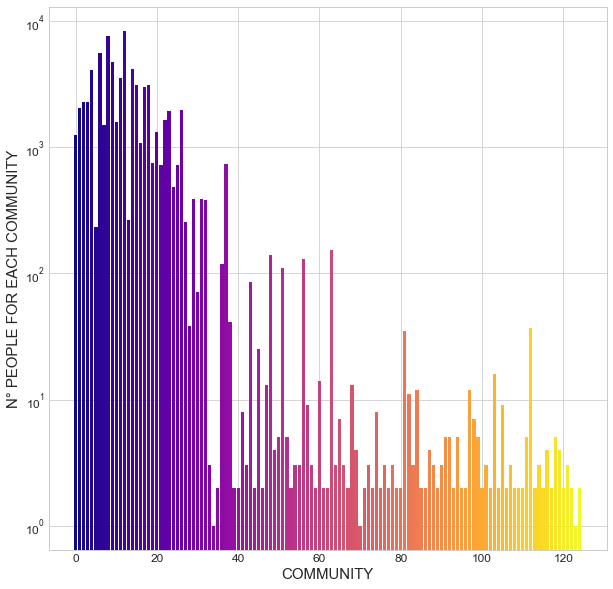

In [98]:
plot_community(partition_louvain_dict)

## INFOMAP COMMUNITY
Infomap cerca di costruire un raggruppamento che fornisca la lunghezza descrittiva più breve per un random walker sul grafico, dove la lunghezza della descrizione è misurata dal numero atteso di bit per nodo richiesto per codificare un random walk. La descrizione di una rete come un insieme di community interconnesse è intesa come regolarità del flusso di informazioni che passa nella rete, filtrando i dettagli relativamente poco importanti. Le mappe migliori sono quelle che trasmettono una grande quantità di informazioni pur richiedendo una larghezza di banda minima; cioè sono buone compressioni.

In [16]:
if path.exists("./file pickle/infomap_communities.pkl"):
    print("EXIST")
    infile = open("./file pickle/infomap_communities.pkl",'rb')
    infomap_communities = pickle.load(infile)
    infile.close()
else:
    infomap_communities = algorithms.infomap(grafo)
    f = open("./file pickle/infomap_communities.pkl","wb")
    pickle.dump(infomap_communities, f)
    f.close()

infomap_json= infomap_communities.to_json()
infomap_dict = json.loads(infomap_json)

infomap_communities_dict = {} 
for i,c in enumerate(infomap_dict["communities"]): 
    for name in c: 
        infomap_communities_dict[name] = i

infomap_communities_count = {}
for i in range(max(infomap_communities_dict.values())+1):
    infomap_communities_count[i] = len([k for (k, v) in infomap_communities_dict.items() if v == i ])

print("N° di community trovate: ", len(infomap_communities_count))
print("N° utenti per community:\n",infomap_communities_count)

EXIST
N° di community trovate:  83
N° utenti per community:
 {0: 67832, 1: 3202, 2: 710, 3: 398, 4: 153, 5: 140, 6: 130, 7: 110, 8: 100, 9: 37, 10: 25, 11: 12, 12: 11, 13: 9, 14: 9, 15: 8, 16: 8, 17: 7, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2}


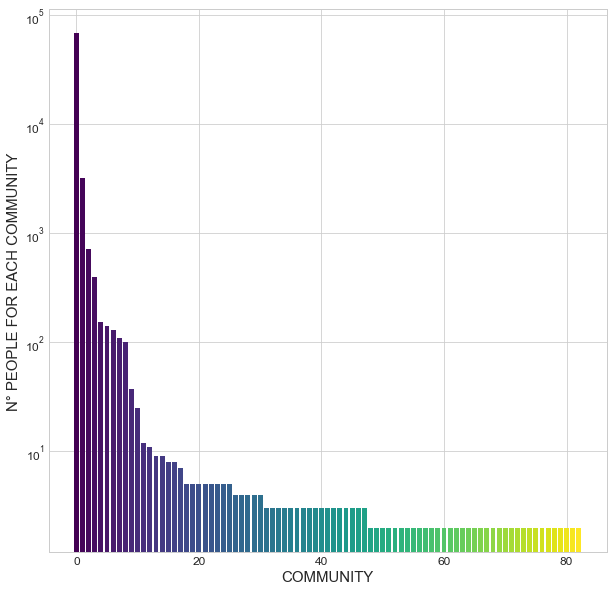

In [100]:
plot_community(infomap_communities_count)

## CLIQUE COMMUNITY
Le cliques sono sottografi in cui ogni nodo è connesso a ogni altro nodo della cricca. Poiché i nodi non possono essere collegati più strettamente di così, non sorprende che ci siano molti approcci al rilevamento di comunità nelle reti basati sul rilevamento di clique in un grafo.

In [19]:
clique_communities = []

if path.exists("./file pickle/clique_communities.pkl"):
    print('EXIST')
    infile = open("./file pickle/clique_communities.pkl",'rb')
    clique_communities = pickle.load(infile)
    infile.close()
else:
    clique_communities = list(community.k_clique_communities(grafo, 3))
    f = open("./file pickle/clique_communities.pkl","wb")
    pickle.dump(clique_communities, f)
    f.close()

print("N° di community a 3 clique: ",len(clique_communities))

EXIST
N° di community a 3 clique:  4


# PLOT

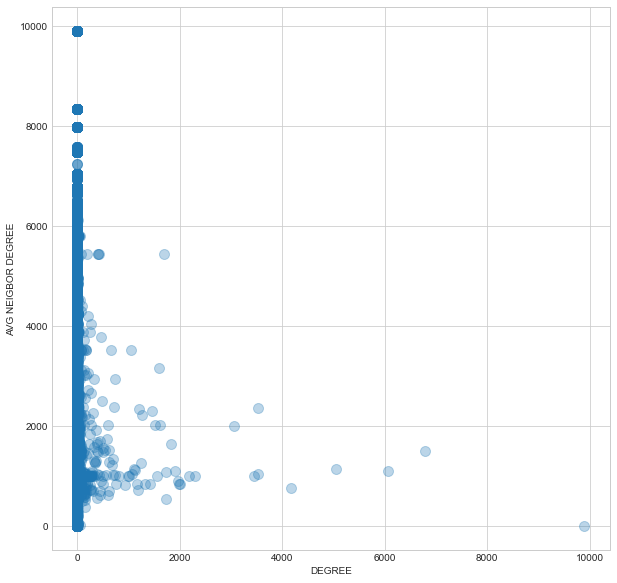

In [40]:
r = degree_assortativity
x=degree_dict.values()
y=avg_neighbor_degree.values()
plt.figure(figsize=(10,10))
plt.xlabel("DEGREE")
plt.ylabel("AVG NEIGBOR DEGREE");
plt.scatter(x, y,marker='o',s=100, alpha=0.3)

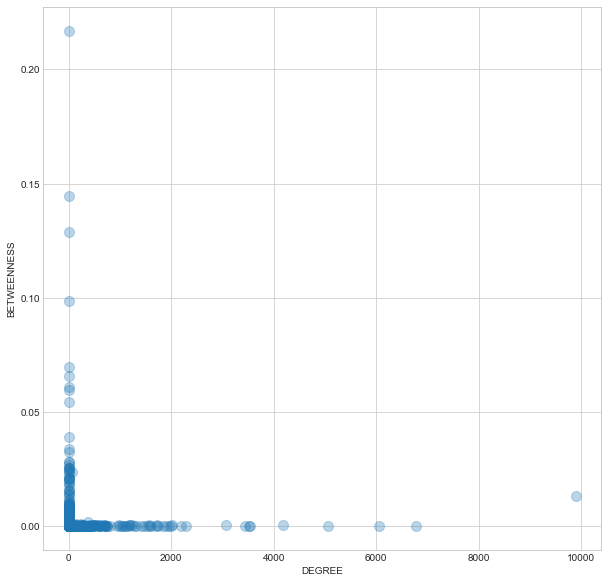

In [41]:

x=degree_dict.values()
y=betweenness_dict.values()
plt.figure(figsize=(10,10))
plt.xlabel("DEGREE")
plt.ylabel("BETWEENNESS");
plt.scatter(x, y,marker='o',s=100, alpha=0.3)

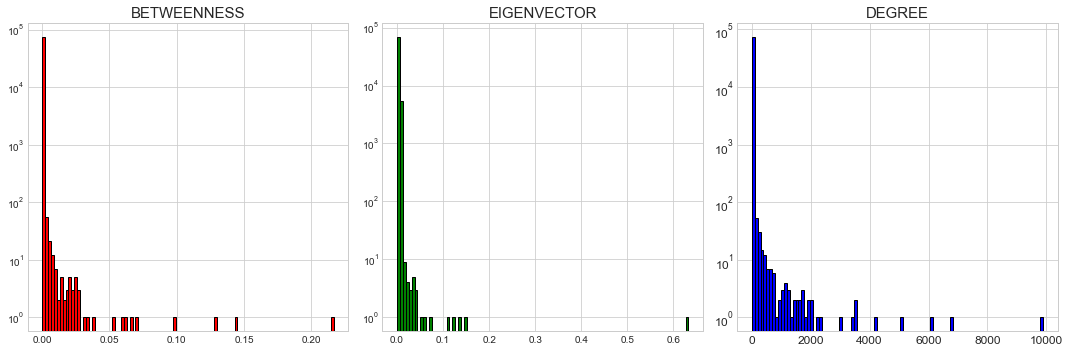

In [114]:
#plt.figure(figsize=(15,15))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

ax0.hist(list(betweenness_dict.values()),bins=100, log=True, color='red', edgecolor="k")
ax0.set_title('BETWEENNESS',fontsize=15)

ax1.hist(list(eigenvector_dict.values()),bins=100, log=True, color='green', edgecolor="k")
ax1.set_title('EIGENVECTOR',fontsize=15)

ax2.hist(list(degree_dict.values()),bins=100, log=True, color='blue', edgecolor="k")
ax2.set_title('DEGREE',fontsize=15)

fig.tight_layout()
plt.show()

In [122]:
infile = open("./file pickle/pos_spring_layout.pkl",'rb')
pos = pickle.load(infile)
infile.close()

## PLOT 1:  Sentimenti Analysis

Ogni nodo è colorato secondo la sentiment analysis effettuata sul commento effettuato o sul video pubblicato

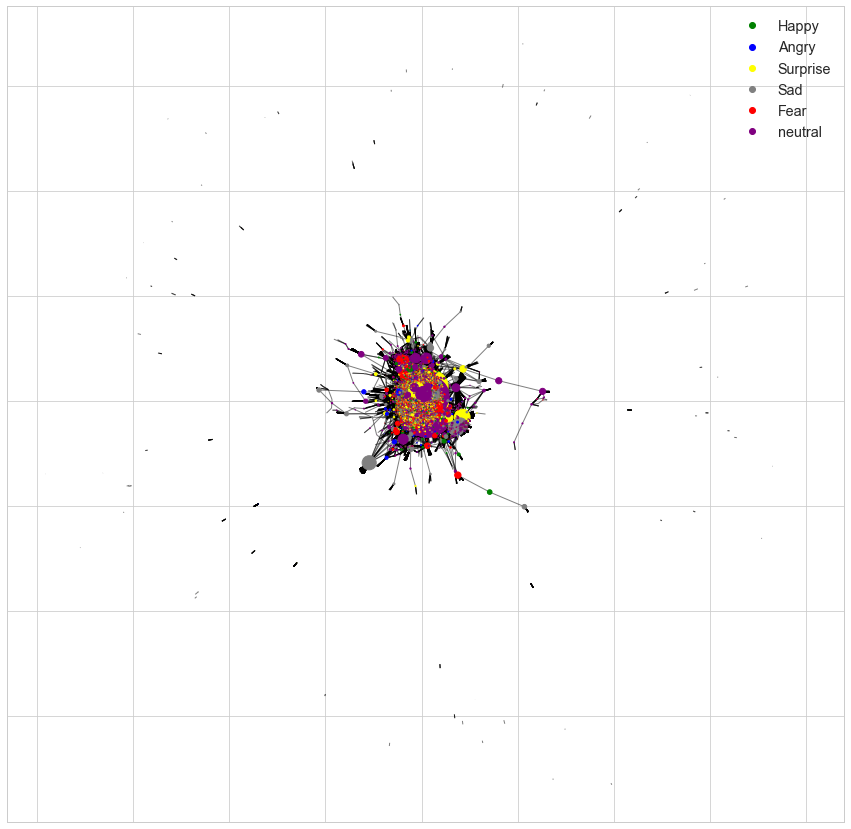

In [195]:
legend = {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'neutral': 'purple' }
nodi = list(grafo.nodes())
node_color = []
for n in nodi:
    node_color.append(grafo.nodes[n]['color'])
    
plt.figure(figsize=(15,15))
cmap = cm.get_cmap('prism')
node_size =  [v * 10000 for v in betweenness_dict.values()]

nx.draw_networkx_nodes(grafo, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(grafo, pos, alpha=0.5)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend.values()]

plt.legend(markers, legend.keys(), loc='best', fontsize='x-large')

## PLOT 2: dimensione dei nodi in base a degree e betweenness

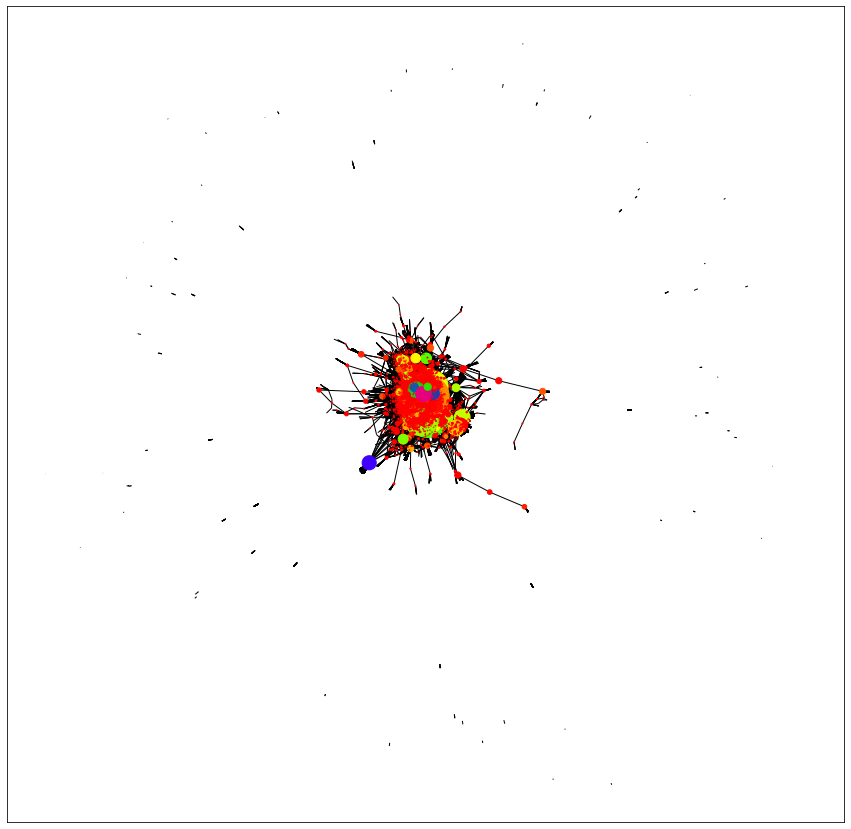

In [23]:
plt.figure(figsize=(15,15))
cmap = cm.get_cmap('prism')
node_color = [2000.0 * grafo.degree(v) for v in grafo]
node_size =  [v * 10000 for v in betweenness_dict.values()]

nx.draw_networkx(grafo, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, cmap=cmap)

## PLOT 3: basato su community (modular community)

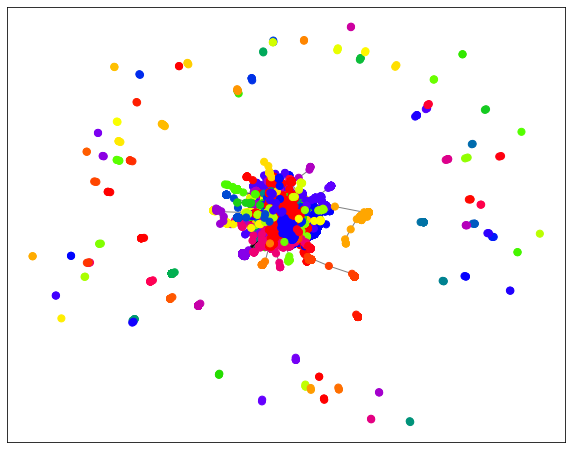

In [24]:
plt.figure(figsize=(10, 8))
cmap = cm.get_cmap('prism', max(modularity_dict.values()) + 1)

nx.draw_networkx_nodes(grafo, pos, modularity_dict.keys(), node_size=50, cmap=cmap, node_color=list(modularity_dict.values()))
nx.draw_networkx_edges(grafo, pos, alpha=0.5)
plt.show()

## PLOT 4: basato sulle community di Louvain (best partition) 

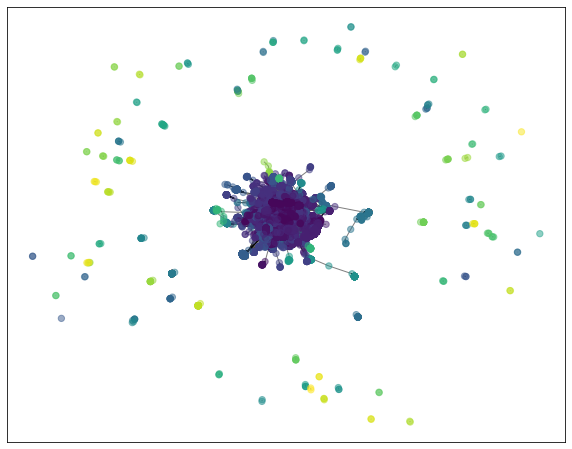

In [25]:
#pos = nx.spring_layout(grafo)
# color the nodes according to their partition
plt.figure(figsize=(10,8))
cmap = cm.get_cmap('viridis', max(partition_louvain.values()) + 1)
nx.draw_networkx_nodes(grafo, pos, partition_louvain.keys(), node_size=40,cmap=cmap, node_color=list(partition_louvain.values()), alpha=0.5)
nx.draw_networkx_edges(grafo, pos, alpha=0.5)
plt.show()

## PLOT 5: grafo delle 20 persone più influenti 
Creo un sotto dataset che si riferisce alle 20 persone più influenti e grafico le interazioni 

In [119]:
dt = pd.DataFrame()
for tb in top_betweenness:
    dt = dt.append(dataset[dataset['channel_id_y']==tb[0]])
print(len(dt))

95608


In [127]:
grafo2 = nx.Graph()
for (channel_video_id, channel_comment_id, sentiment_video, sentiment_comment) in zip(dt['channel_id_y'], dt['channel_id_x'], dt['sentiment_analysis_title_translated'], dt['sentiment_analysis_commenti']):
    grafo2.add_node(channel_video_id, color= extract_color(sentiment_video))
    grafo2.add_node(channel_comment_id, color=extract_color(sentiment_comment))
    
    grafo2.add_edge(channel_video_id, channel_comment_id)
    
print(nx.info(grafo2))

Name: 
Type: Graph
Number of nodes: 47317
Number of edges: 65294
Average degree:   2.7599


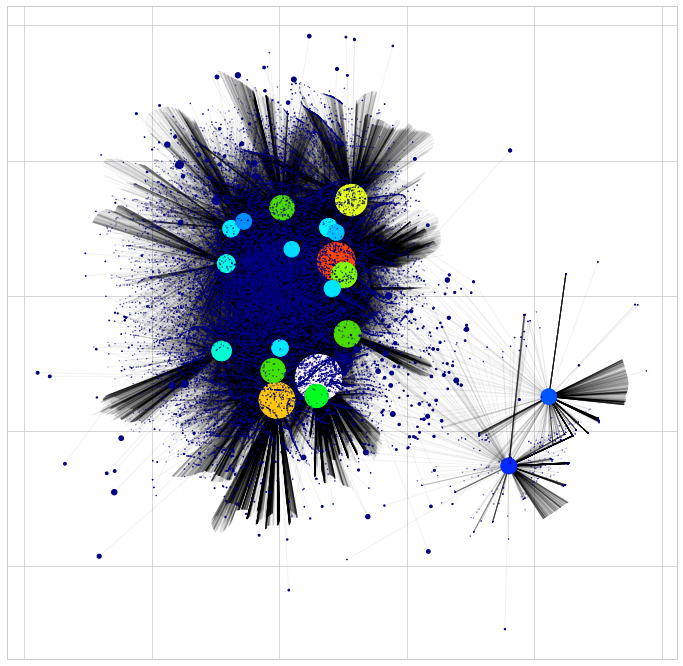

In [205]:
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('gist_ncar')
node_color = [2000.0 * grafo2.degree(v) for v in grafo2]
node_size =  [10000 * betweenness_dict[n] for n in grafo2]

nx.draw_networkx_nodes(grafo2, pos=pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=cmap)
nx.draw_networkx_edges(grafo2, pos, alpha=0.05)

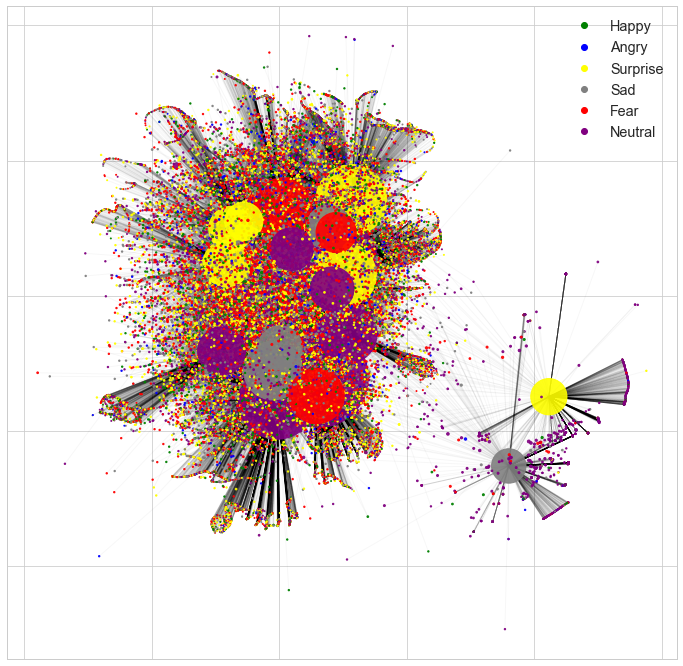

In [206]:
legend = {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'Neutral': 'purple' }
nodi = list(grafo2.nodes())


node_color = []
inserito = False
for n in nodi:
    node_color.append(grafo2.nodes[n]['color'])
    
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('prism')
node_size =  [degree_dict[n] for n in grafo2]

nx.draw_networkx_nodes(grafo2, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, alpha=0.9)
nx.draw_networkx_edges(grafo2, pos, alpha=0.03)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend.values()]
plt.legend(markers, legend.keys(), loc='best', fontsize='x-large')

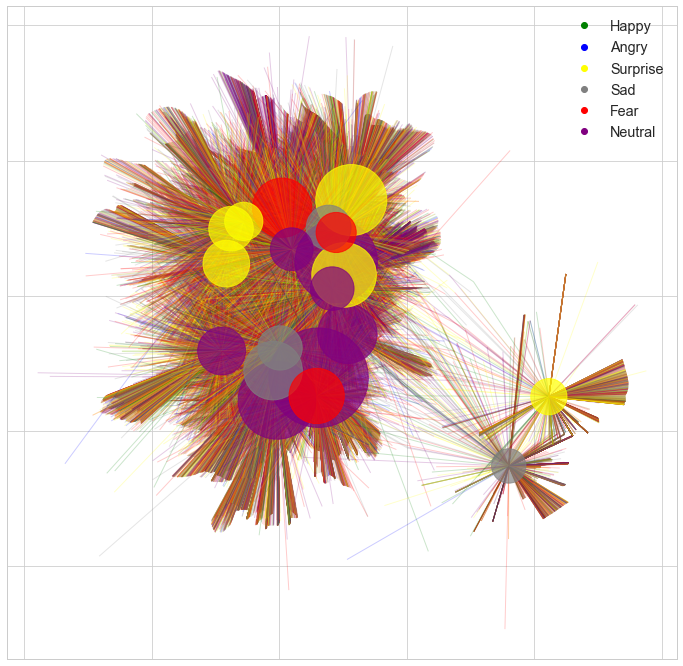

In [209]:
legend = {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'Neutral': 'purple' }
nodi = list(grafo2.nodes())

node_size = []
node_color = []
inserito = False
for n in nodi:
    node_color.append(grafo2.nodes[n]['color'])
    for tb in top_betweenness:
        if n in tb[0]:
            node_size.append(grafo2.degree(n))
            inserito = True
    if inserito==False:
        node_size.append(0)
    inserito = False
    
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('prism')

nx.draw_networkx_nodes(grafo2, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, cmap=cmap, alpha=0.7)
nx.draw_networkx_edges(grafo2, pos, alpha=0.2, edge_color=node_color )
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend.values()]
plt.legend(markers, legend.keys(), loc='best', fontsize='x-large')

In [255]:
sentiment_top20 = pd.DataFrame()

# questa funzione prende il valore masssimo di sentiment analysis 
def extract_sentiment(s):
    j = json.loads(s.replace("'", "\""))
    if j['Happy']==0.0 and j['Angry']==0.0 and j['Surprise']==0.0 and j['Sad']==0.0 and j['Fear']==0.0:
        return 'Neutral'
    return max(j.items(), key=itemgetter(1))[0]

def calcola_sentiment(data, sentiment_dict, node):
    for sentiment_comment in data['sentiment_analysis_commenti']:
        s = extract_sentiment(sentiment_comment)
        sentiment_dict[s] = sentiment_dict[s]+1
    a = pd.DataFrame(sentiment_dict, index=[node])
    a['N° utenti'] = len(data)
    a['Sentiment'] = extract_sentiment(data.iloc[0]['sentiment_analysis_title_translated'])
    return a
    
for tb in top_betweenness:
    data = dataset[dataset['channel_id_y']==tb[0]]
    sentiment_dict = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0, 'Neutral': 0}
    s = dataset[dataset['channel_id_y']==tb[0]]
    sentiment_top20 = sentiment_top20.append(calcola_sentiment(data, sentiment_dict, tb[0]))

sentiment_top20

,Happy,Angry,Surprise,Sad,Fear,Neutral,N° utenti,Sentiment
UCaXkIU1QidjPwiAYu6GcHjg,1393,759,4170,2871,3507,2506,15206,Surprise
UC0QHWhjbe5fGJEPz3sVb6nw,1238,405,2278,2094,3062,1696,10773,Neutral
UC3XTzVzaHQEd30rQbuvCtTQ,1283,457,2692,1815,2637,1301,10185,Neutral
UCn4sPeUomNGIr26bElVdDYg,968,385,1483,1617,1428,887,6768,Sad
UCMSsLqxqvZsNXi0Z-VjN89A,635,201,1020,846,1455,727,4884,Surprise
UCupvZG-5ko_eiXAupbDfxWw,530,310,1665,1037,1433,819,5794,Surprise
UCH1oRy1dINbMVp3UFWrKP0w,558,269,692,1511,1170,652,4852,Sad
UCXIJgqnII2ZOINSWNOGFThA,718,218,972,1199,896,920,4923,Sad
UCC_0vyFTKk1Nlodo4QsiQkw,500,167,1152,678,1398,563,4458,Surprise
UCoWZ_PsG1SSShZ_6ORL5-uA,592,156,819,807,1061,857,4292,Happy
